In [1]:
import pandas as pd
import matplotlib.pyplot as mat
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv('car_evaluation.csv')

In [3]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
df.shape

(1727, 7)

In [5]:
df.describe

<bound method NDFrame.describe of       vhigh vhigh.1      2   2.1  small   low  unacc
0     vhigh   vhigh      2     2  small   med  unacc
1     vhigh   vhigh      2     2  small  high  unacc
2     vhigh   vhigh      2     2    med   low  unacc
3     vhigh   vhigh      2     2    med   med  unacc
4     vhigh   vhigh      2     2    med  high  unacc
...     ...     ...    ...   ...    ...   ...    ...
1722    low     low  5more  more    med   med   good
1723    low     low  5more  more    med  high  vgood
1724    low     low  5more  more    big   low  unacc
1725    low     low  5more  more    big   med   good
1726    low     low  5more  more    big  high  vgood

[1727 rows x 7 columns]>

In [6]:
# label_encoders = {}
for column in df.columns:
    # le = LabelEncoder()
    df[column] = LabelEncoder().fit_transform(df[column])
    # label_encoders[column] = le

In [7]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [8]:
# label_encoders

In [9]:
df.dtypes

vhigh      int32
vhigh.1    int32
2          int32
2.1        int32
small      int32
low        int32
unacc      int32
dtype: object

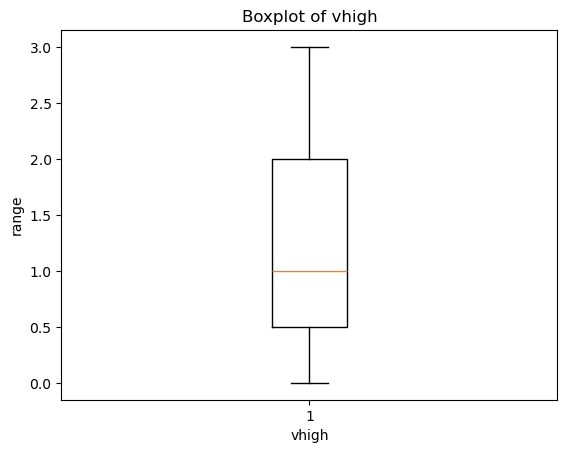

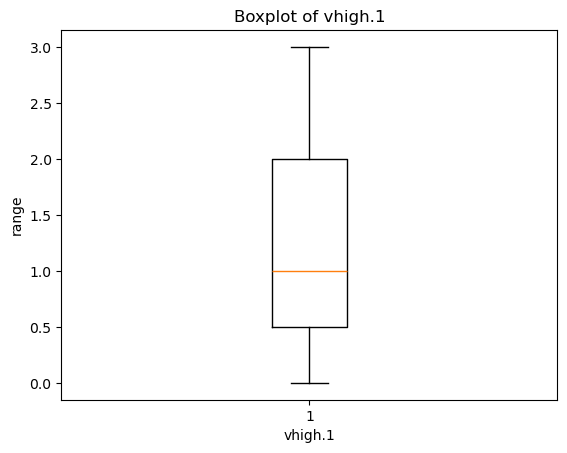

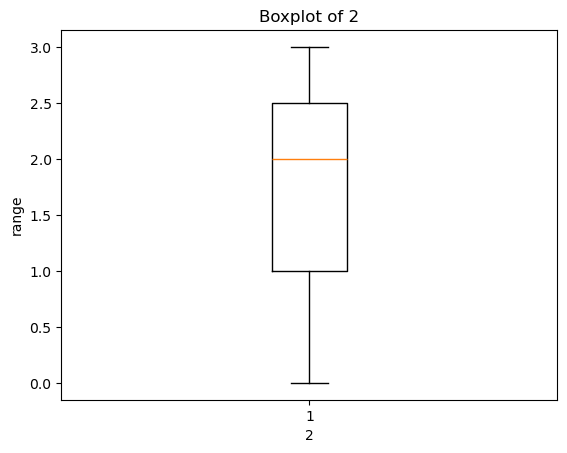

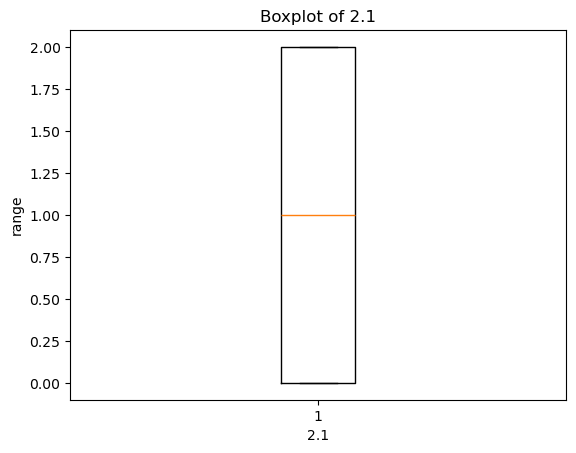

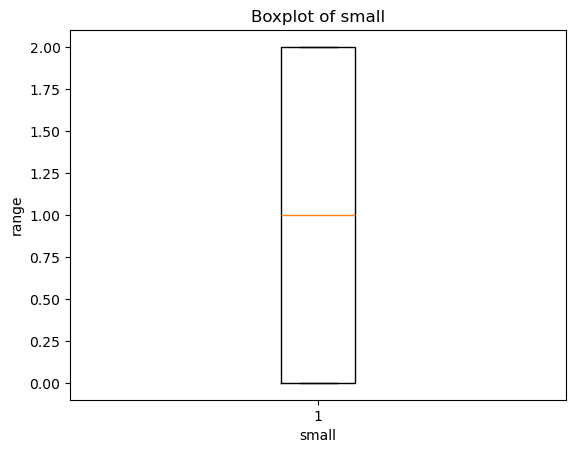

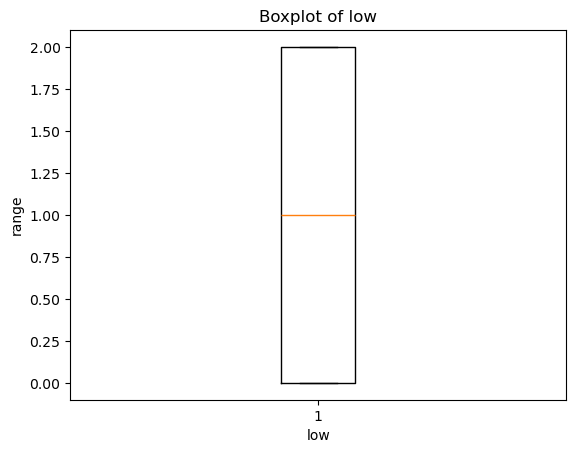

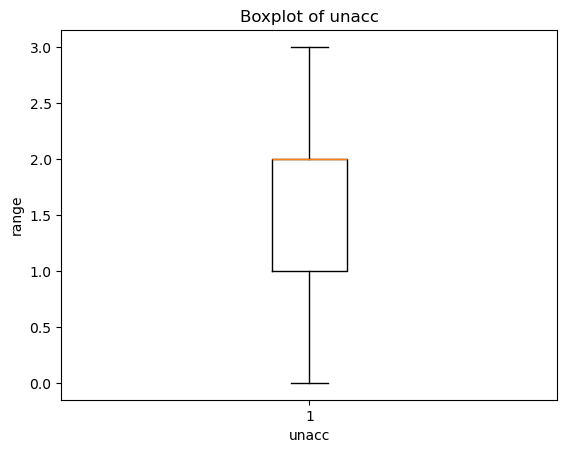

In [10]:
import numpy as np

for i in df.columns:
    if df[i].dtype == np.int32 or df[i].dtype == np.float64:
        mat.figure()
        mat.boxplot(df[i])
        mat.xlabel(i)
        mat.ylabel('range')
        mat.title(f'Boxplot of {i}')
        mat.show()

In [101]:
df.corr()

,vhigh,vhigh.1,2,2.1,small,low
vhigh,1.000000e+00,-1.043357e-03,1.043357e-03,9.523677e-04,-9.523677e-04,-3.200145e-16
vhigh.1,-1.043357e-03,1.000000e+00,1.043357e-03,9.523677e-04,-9.523677e-04,-1.012963e-16
2,1.043357e-03,1.043357e-03,1.000000e+00,-9.523677e-04,9.523677e-04,6.731959e-17
2.1,9.523677e-04,9.523677e-04,-9.523677e-04,1.000000e+00,8.693132e-04,2.362177e-17
small,-9.523677e-04,-9.523677e-04,9.523677e-04,8.693132e-04,1.000000e+00,-7.231156e-18
low,-3.200145e-16,-1.012963e-16,6.731959e-17,2.362177e-17,-7.231156e-18,1.000000e+00


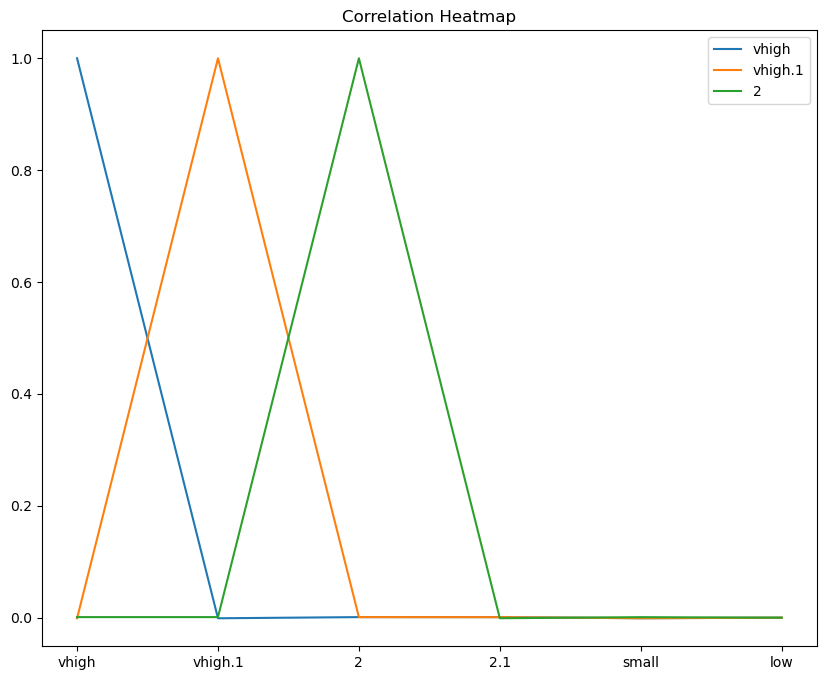

In [123]:
import seaborn as sns
mat.figure(figsize=(10, 8))
mat.plot(df.corr()['vhigh'],label='vhigh')
mat.plot(df.corr()['vhigh.1'],label='vhigh.1')
mat.plot(df.corr()['2'],label='2')
mat.legend()

mat.title('Correlation Heatmap')
mat.show()

In [91]:
df.isna().sum().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
dtype: int64

In [99]:
df.duplicated().sum()

0

In [97]:
y=df['unacc']

KeyError: 'unacc'

In [12]:
y

0       2
1       2
2       2
3       2
4       2
       ..
1722    1
1723    3
1724    2
1725    1
1726    3
Name: unacc, Length: 1727, dtype: int32

In [13]:
df.drop(columns=['unacc'],inplace=True)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=0)

In [15]:
K = []
training = []
test = []
scores = {}

In [16]:
for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
    training_score = clf.score(X_train, y_train)
    # training.append(training_score)
    test_score = clf.score(X_test, y_test)
    # test.append(test_score)
    # K.append(k)
    scores[k] = [training_score, test_score]

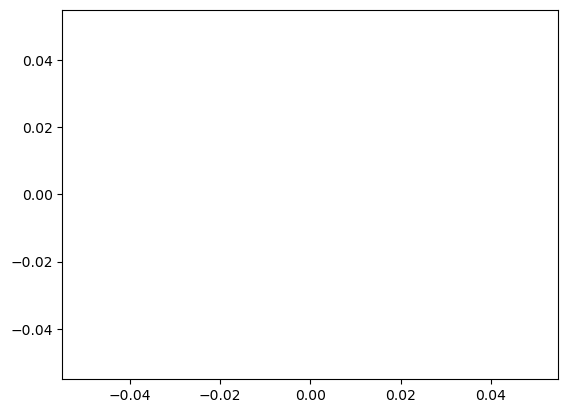

In [17]:
mat.plot(K,training)
mat.plot(K,test)
mat.show()

In [18]:
clf = KNeighborsClassifier(n_neighbors = 7)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [19]:
y_pred

array([0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 3, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 3, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2,

In [20]:
y_test

1318    0
124     2
648     2
249     2
1598    2
       ..
1481    2
1327    2
317     2
142     2
427     0
Name: unacc, Length: 346, dtype: int32

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
print(accuracy_score(y_pred, y_test))

0.930635838150289


In [23]:
from sklearn.tree import *

In [24]:
K=[]
value={}

In [25]:
k=1
for i in range(2,20):
    for j in range(2,20):
        dt=DecisionTreeClassifier(criterion='entropy',max_depth=i,min_samples_split=j)
        dt.fit(X_train, y_train)
        ypred=dt.predict(X_test)
        K.append(accuracy_score(ypred,y_test))
        value[k]=[i,j]
        k=k+1;

In [26]:
K.index(max(K))

198

In [28]:
len(K)

324

In [73]:
value[K.index(max(K))+1]

[13, 2]

In [75]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=13,min_samples_split=2)
dt.fit(X_train, y_train)
ypred=dt.predict(X_test)

In [77]:
accuracy_score(ypred,y_test)

0.9739884393063584

[Text(0.5360753676470589, 0.9642857142857143, 'x[3] <= 0.5\nentropy = 1.196\nsamples = 1381\nvalue = [307, 55, 970, 49]'),
 Text(0.5213694852941176, 0.8928571428571429, 'entropy = 0.0\nsamples = 463\nvalue = [0, 0, 463, 0]'),
 Text(0.5287224264705883, 0.9285714285714286, 'True  '),
 Text(0.55078125, 0.8928571428571429, 'x[5] <= 0.5\nentropy = 1.47\nsamples = 918\nvalue = [307.0, 55.0, 507.0, 49.0]'),
 Text(0.5434283088235294, 0.9285714285714286, '  False'),
 Text(0.28860294117647056, 0.8214285714285714, 'x[0] <= 2.5\nentropy = 1.646\nsamples = 299\nvalue = [165, 21, 64, 49]'),
 Text(0.15073529411764705, 0.75, 'x[0] <= 0.5\nentropy = 1.612\nsamples = 221\nvalue = [127.0, 21.0, 24.0, 49.0]'),
 Text(0.058823529411764705, 0.6785714285714286, 'x[1] <= 2.5\nentropy = 0.785\nsamples = 77\nvalue = [59, 0, 18, 0]'),
 Text(0.04411764705882353, 0.6071428571428571, 'x[2] <= 0.5\nentropy = 0.208\nsamples = 61\nvalue = [59, 0, 2, 0]'),
 Text(0.029411764705882353, 0.5357142857142857, 'x[4] <= 1.5\nen

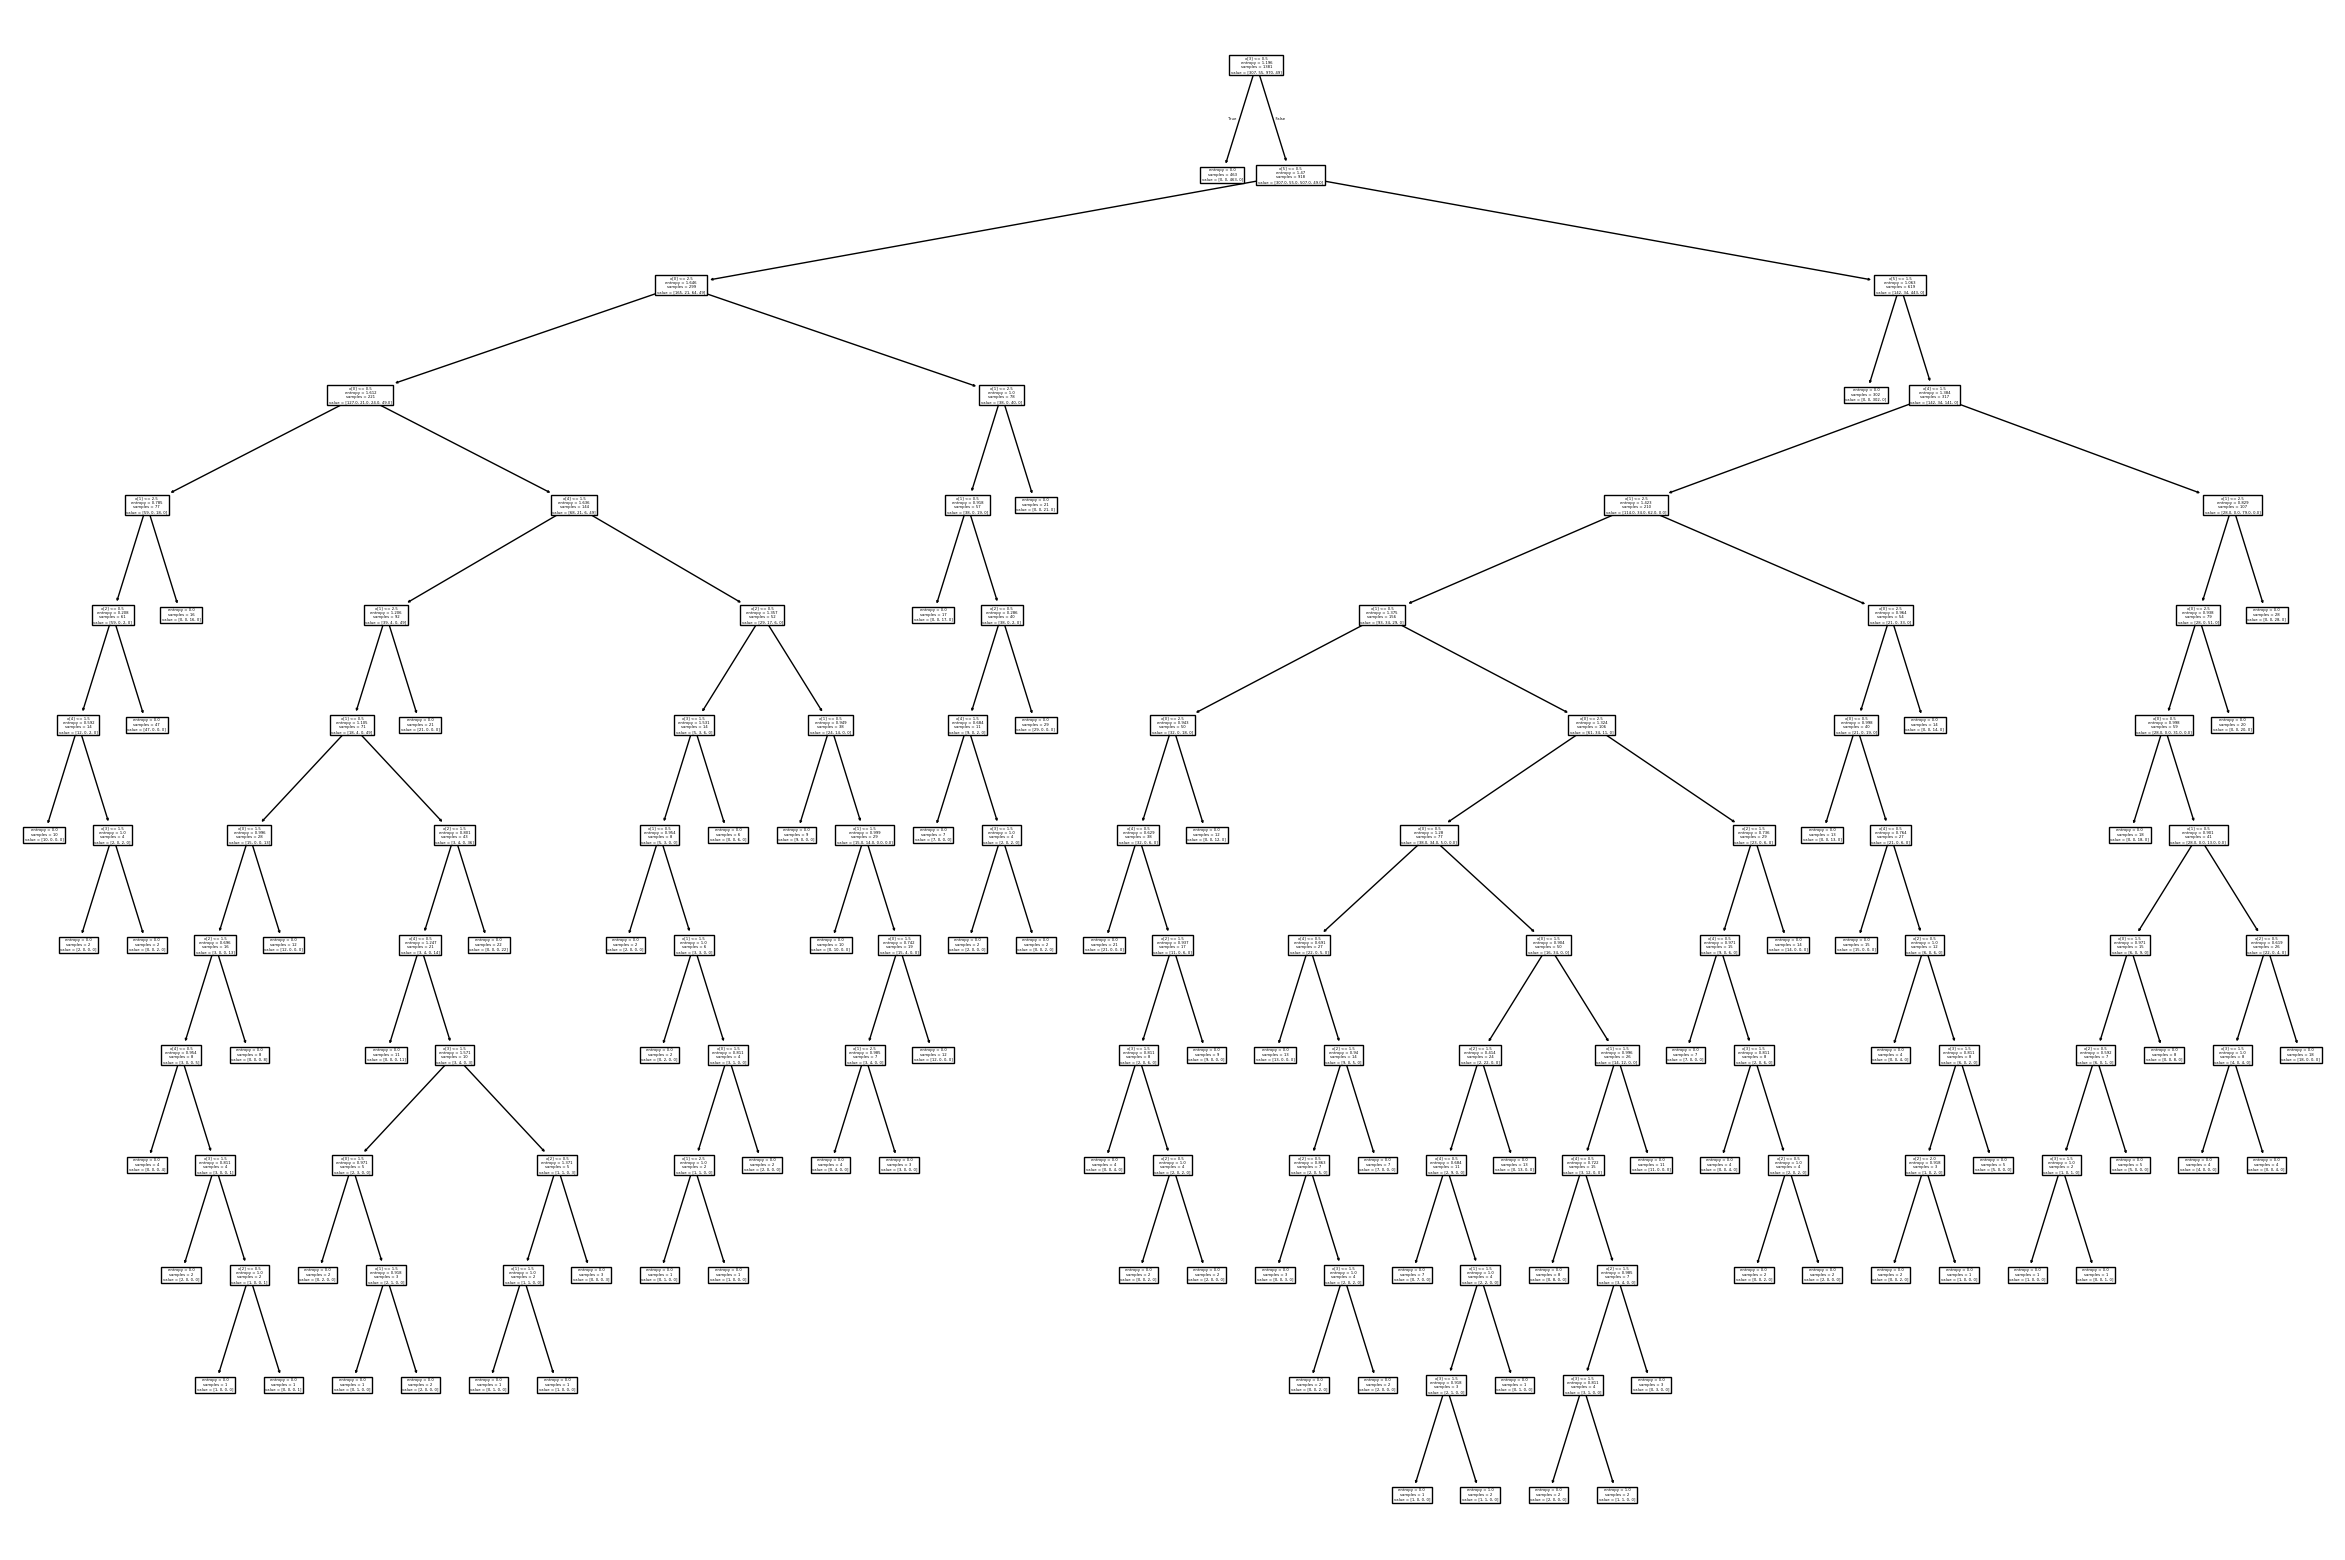

In [79]:
from sklearn import tree
mat.figure(figsize=(30,20))
tree.plot_tree(dt)